# PyTorch로 시작하는 딥러닝 입문

## 로지스틱 회귀

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

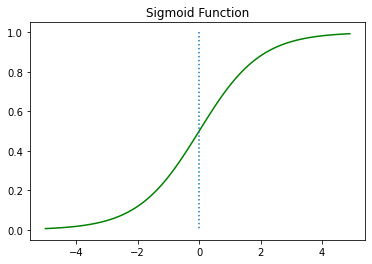

In [5]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0], [1.0,0], ':')
plt.title('Sigmoid Function')
plt.show()

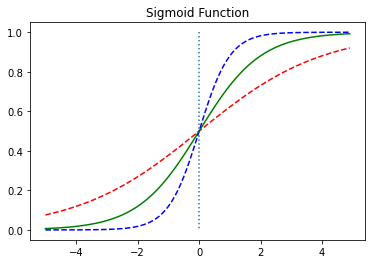

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') 
plt.plot(x, y2, 'g') 
plt.plot(x, y3, 'b', linestyle='--') 
plt.plot([0,0],[1.0,0.0], ':') 
plt.title('Sigmoid Function')
plt.show()

### 파이토치로 함수 구현

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [9]:
torch.manual_seed(1)

x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

print(x_train)
print(x_train.shape)
print(y_train)
print(y_train.shape)

tensor([[1., 2.],
        [2., 3.],
        [3., 1.],
        [4., 3.],
        [5., 3.],
        [6., 2.]])
torch.Size([6, 2])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])
torch.Size([6, 1])


In [12]:
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [14]:
hypothesis = 1 / (1+torch.exp(-(x_train.matmul(W)+b)))
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [15]:
hypothesis = torch.sigmoid(x_train.matmul(W)+b)
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)


위에서 만든 구현법이나 torch.sigmoid와 같은 결과 값이 나온다. grad_fn만 다르긴 하지만 크게 중요치는 않음. 하지만 그냥 torch.sigmoid를 사용하도록 하자(구현의 번거로움)

In [16]:
losses = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1- hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)


In [17]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [18]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

위에서 직접 구현하기는 했으나 역시 이미 PyTorch에서는 다 구현이 되어있음

In [19]:
# 최종 정리

import torch
import torch.optim as optim

x_data = [[1,2], [2,3], [3,1], [4,3], [5,3], [6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b], lr=1)
total_epochs = 1000

for epoch in range(total_epochs + 1):

    hypothesis = torch.sigmoid(x_train.matmul(W)+b)
    cost = -(y_train*torch.log(hypothesis) + (1-y_train)*torch.log(1-hypothesis)).mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {}/{} Cost {:.6f}'.format(epoch, total_epochs, cost.item()))



Epoch 0/1000 Cost 0.693147
Epoch 100/1000 Cost 0.134722
Epoch 200/1000 Cost 0.080643
Epoch 300/1000 Cost 0.057900
Epoch 400/1000 Cost 0.045300
Epoch 500/1000 Cost 0.037261
Epoch 600/1000 Cost 0.031673
Epoch 700/1000 Cost 0.027556
Epoch 800/1000 Cost 0.024394
Epoch 900/1000 Cost 0.021888
Epoch 1000/1000 Cost 0.019852


In [20]:
hypothesis = torch.sigmoid(x_train.matmul(W)+b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)


In [22]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)
print(W)
print(b)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])
tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)
